In [2]:
# Library for data handling
import numpy as np
import pandas as pd

# Library for splitting data into Training and Testing datasets
from sklearn.model_selection import train_test_split

# QLattice library
import feyn

# Visualization library
import seaborn as sns

This version of feyn and the QLattice is available for academic, personal, and non-commercial use. By using the community version of this software you agree to the terms and conditions which can be found at `https://abzu.ai/eula`.


In [3]:
# Load data
data_dir = '/Users/shehbeel/Documents/frailty-clinical-model/data/'
data_dir2 = '/Users/shehbeel/Documents/frailty-clinical-model/analyses/02-frailty-modeling/results/'
meta = pd.read_csv(data_dir + 'GSE144304_meta.txt', delimiter='\t', index_col=0)
counts = pd.read_csv(data_dir2 + 'GSE144304_raw_counts_with_genes_filtered50.csv', index_col=0)

# Transpose counts
counts = counts.T
#counts = counts.reset_index()

# Merge counts and meta data
df = pd.merge(meta, counts, left_index=True, right_index=True)

# Drop condition for now
df = df.drop(['condition'], axis=1)

# Convert target variable to boolean
#data['treatment'] = data['treatment'].map({'frail': True, 'fit': False, 'young':False}) 
df["frailty"] = df["frailty"].replace({"1":True, "0":False}).astype(bool)

df

,gender,frailty,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,...,PRR33,LOC102724474,MIR5010,MSANTD7,C2orf81,MIR24-2,LOC105373244,MIR133A2,LOC105375421,LOC122455342
s301,male,True,99,20,284,101,19,15,252,120,...,219,4,0,4,2,1,18,4,2,5
s302,male,True,54,3,381,127,7,39,113,145,...,165,19,1,2,1,2,42,7,2,5
s303,male,True,44,2,303,123,9,16,147,82,...,336,26,1,5,0,2,14,9,1,11
s304,male,True,59,3,306,146,1,6,92,83,...,197,23,1,5,0,1,18,1,0,13
s305,male,True,52,0,402,103,10,31,115,137,...,208,30,0,1,1,1,32,0,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s530,female,False,54,0,349,139,5,4,51,70,...,188,12,3,3,0,2,26,5,1,27
s531,male,False,73,0,395,115,16,13,103,69,...,318,29,1,9,0,0,44,4,0,5
s401,male,False,55,2,252,97,4,17,48,62,...,187,25,3,10,0,3,24,2,3,14
s404,male,False,72,4,204,99,21,31,196,115,...,180,17,5,2,0,0,6,9,2,10


In [4]:
df.dtypes

gender          object
frailty           bool
TSPAN6           int64
TNMD             int64
DPM1             int64
                 ...  
MIR24-2          int64
LOC105373244     int64
MIR133A2         int64
LOC105375421     int64
LOC122455342     int64
Length: 17152, dtype: object

In [10]:
# # Split the dataset into training data and labels
# X = df.loc[:, df.columns != 'frailty']#.values
# y = df.loc[:, df.columns == 'frailty'].values.ravel()

# # Sanity check
# print(X[:5])
# print(y[:5])

     gender  TSPAN6  TNMD  DPM1  SCYL3  C1orf112  FGR  CFH  FUCA2  GCLC  ...  \
s301   male      99    20   284    101        19   15  252    120   169  ...   
s302   male      54     3   381    127         7   39  113    145   248  ...   
s303   male      44     2   303    123         9   16  147     82   157  ...   
s304   male      59     3   306    146         1    6   92     83   270  ...   
s305   male      52     0   402    103        10   31  115    137   218  ...   

      PRR33  LOC102724474  MIR5010  MSANTD7  C2orf81  MIR24-2  LOC105373244  \
s301    219             4        0        4        2        1            18   
s302    165            19        1        2        1        2            42   
s303    336            26        1        5        0        2            14   
s304    197            23        1        5        0        1            18   
s305    208            30        0        1        1        1            32   

      MIR133A2  LOC105375421  LOC122455342  

In [11]:

# # Import sklearn package for splitting data into Training and Testing datasets
# from sklearn.model_selection import train_test_split

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# #Sanity check
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(64, 17151) (16, 17151) (64,) (16,)


---

# Perform QLattice

In [7]:
# Connect to QLattice
ql = feyn.QLattice()

In [14]:
stypes = {
    'gender': 'c'
    }

In [17]:
# Set the variable to predict as output
models = ql.auto_run(df, 
                     output_name='frailty', 
                     kind='classification', 
                     stypes=stypes,
                     criterion='bic', 
                     max_complexity=4
                     )

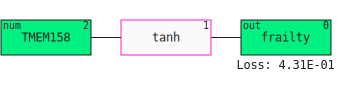

In [19]:
model = models[1]
model

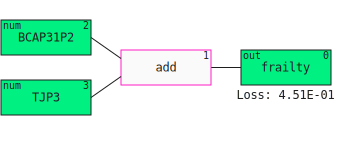

In [26]:
models[4]

In [21]:
input_node = model[2]
#print(f"category weights: {input_node.params['categories']}")
print(f"bias: {input_node.params['bias']}")

bias: 0.27164419739294265


When we predict on a sample that contains a category in the list above then we first convert that category to category_weight + bias.

This value gets passed into the functions inside the model and behaves like a normal numerical value.

If there are any NaN values present for some observations in a categorical feature, then the NaN values will be interpretated as a category.

In [22]:
model = models[0]
model.plot_probability_scores(test)

NameError: name 'test' is not defined

---

In [28]:
# Train/test split
train, test = train_test_split(df, test_size=0.4, stratify=df['frailty'], random_state=123)

# Instantiate a QLattice
ql = feyn.QLattice()
models = ql.auto_run(train, output_name='frailty', kind='classification', stypes=stypes)
best = models[0]

In [49]:
df

,gender,frailty,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,...,PRR33,LOC102724474,MIR5010,MSANTD7,C2orf81,MIR24-2,LOC105373244,MIR133A2,LOC105375421,LOC122455342
s301,male,True,99,20,284,101,19,15,252,120,...,219,4,0,4,2,1,18,4,2,5
s302,male,True,54,3,381,127,7,39,113,145,...,165,19,1,2,1,2,42,7,2,5
s303,male,True,44,2,303,123,9,16,147,82,...,336,26,1,5,0,2,14,9,1,11
s304,male,True,59,3,306,146,1,6,92,83,...,197,23,1,5,0,1,18,1,0,13
s305,male,True,52,0,402,103,10,31,115,137,...,208,30,0,1,1,1,32,0,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s530,female,False,54,0,349,139,5,4,51,70,...,188,12,3,3,0,2,26,5,1,27
s531,male,False,73,0,395,115,16,13,103,69,...,318,29,1,9,0,0,44,4,0,5
s401,male,False,55,2,252,97,4,17,48,62,...,187,25,3,10,0,3,24,2,3,14
s404,male,False,72,4,204,99,21,31,196,115,...,180,17,5,2,0,0,6,9,2,10


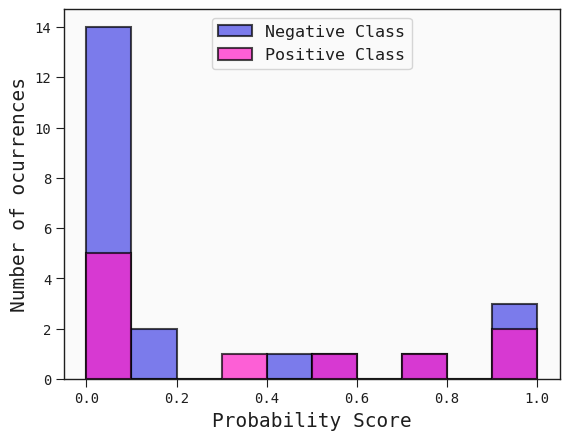

In [38]:
best.plot_probability_scores(test)

In [33]:
best.get_parameters(name='MIR3685')

,MIR3685
scale,0.333333
scale_offset,1.041667
w,-3.429680
bias,0.742975
detect_scale,0.000000


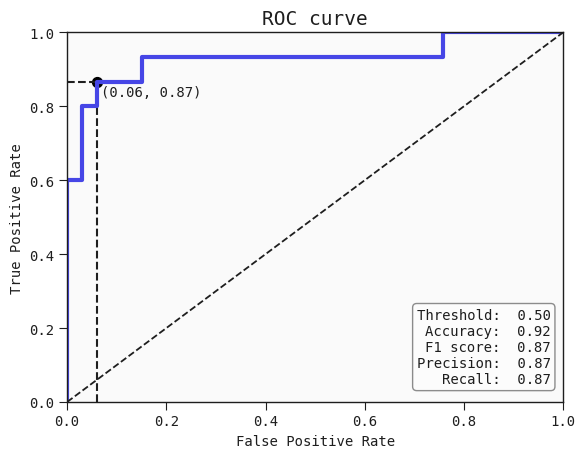

In [35]:
best.plot_roc_curve(train, threshold=0.5)

In [ ]:
# Save the plot
best.plot_roc_curve(data=train, filename="feyn-roc-plot")

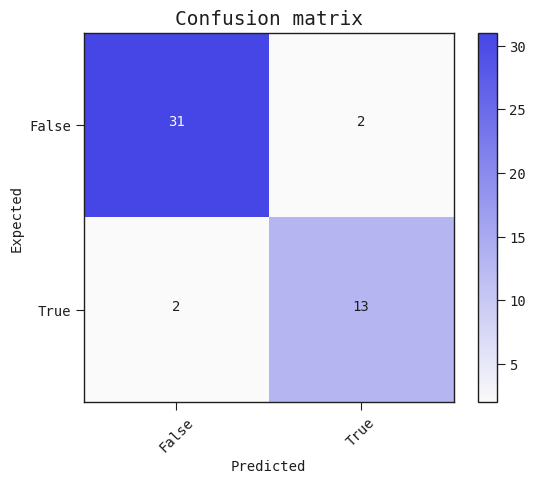

In [36]:
best.plot_confusion_matrix(train, threshold=0.5)

# Save the plot
#best.plot_confusion_matrix(data=train, filename="feyn-confusion-matrix-plot")

In [40]:
# Fixing two input features
best.plot_response_2d(
    data=train,
    fixed={
        'MIR3685': train['MIR3685'].mean(),
        'RPL7AP6': train['RPL7AP6'].median()
    }
)

ValueError: The amount of non-fixed inputs should be exactly two.

In [43]:
ql = feyn.QLattice()

models = ql.sample_models(train.columns, 'frailty', 'classification', max_complexity=10)

models = feyn.fit_models(models, train, 'binary_cross_entropy', 'bic', 4)

models = feyn.prune_models(models, True)

models = feyn.get_diverse_models(
    models=models,
    n=10
)

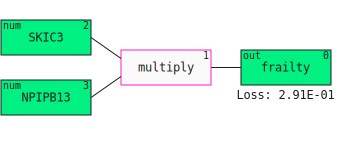

In [48]:
models[0]

---

In [50]:
# Load data
data_dir = '/Users/shehbeel/Documents/frailty-clinical-model/data/'
data_dir2 = '/Users/shehbeel/Documents/frailty-clinical-model/analyses/02-frailty-modeling/results/'
meta = pd.read_csv(data_dir + 'GSE144304_meta.txt', delimiter='\t', index_col=0)
counts = pd.read_csv(data_dir2 + 'GSE144304_raw_counts_with_genes_filtered50.csv', index_col=0)

# Transpose counts
counts = counts.T
#counts = counts.reset_index()

# Merge counts and meta data
df = pd.merge(meta, counts, left_index=True, right_index=True)

# Drop condition for now
df = df.drop(['condition'], axis=1)

df

,gender,frailty,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,...,PRR33,LOC102724474,MIR5010,MSANTD7,C2orf81,MIR24-2,LOC105373244,MIR133A2,LOC105375421,LOC122455342
s301,male,1,99,20,284,101,19,15,252,120,...,219,4,0,4,2,1,18,4,2,5
s302,male,1,54,3,381,127,7,39,113,145,...,165,19,1,2,1,2,42,7,2,5
s303,male,1,44,2,303,123,9,16,147,82,...,336,26,1,5,0,2,14,9,1,11
s304,male,1,59,3,306,146,1,6,92,83,...,197,23,1,5,0,1,18,1,0,13
s305,male,1,52,0,402,103,10,31,115,137,...,208,30,0,1,1,1,32,0,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s530,female,0,54,0,349,139,5,4,51,70,...,188,12,3,3,0,2,26,5,1,27
s531,male,0,73,0,395,115,16,13,103,69,...,318,29,1,9,0,0,44,4,0,5
s401,male,0,55,2,252,97,4,17,48,62,...,187,25,3,10,0,3,24,2,3,14
s404,male,0,72,4,204,99,21,31,196,115,...,180,17,5,2,0,0,6,9,2,10


In [51]:
# Train/test split
train, test = train_test_split(df, test_size=0.4, stratify=df['frailty'], random_state=123)

# Instantiate a QLattice
ql = feyn.QLattice()
models = ql.auto_run(train, output_name='frailty', stypes=stypes)
best = models[0]

KeyboardInterrupt: 

In [ ]:
best = models[0]
best.plot(train, test)
best.plot_regression(test)

In [52]:
df.dtypes

gender          object
frailty          int64
TSPAN6           int64
TNMD             int64
DPM1             int64
                 ...  
MIR24-2          int64
LOC105373244     int64
MIR133A2         int64
LOC105375421     int64
LOC122455342     int64
Length: 17152, dtype: object